In [341]:
import pandas as pd
import seaborn as sns                                                                                     
import matplotlib.pyplot as plt

In [342]:
sns.set_theme(style="darkgrid")
sns.set_palette("rocket_r")

In [343]:
results = pd.read_csv("benchmark_results.csv")
results.head()

,node_count,leaf_count,types_count,process_length,flow_likelihood,flow_duration,bdmm_likelihood,bdmm_duration,use_inverse_flow,use_random_initial_matrix,num_intervals
0,5,3,9,3.187838,-12.020503,52207750,-12.020501,9072958,True,True,1
1,5,3,3,5.432400,-13.057029,2365833,-13.057029,759125,True,True,4
2,13,7,8,2.788467,-24.747374,9373958,-24.747372,3198166,True,False,1
3,3,2,7,0.999359,-6.137367,4330209,-6.137367,936500,False,True,4
4,5,3,6,1.983695,-6.564543,1517291,-6.564543,951833,False,False,1


In [344]:
results = results[results["leaf_count"] > 10]
results["speedup"] = results["bdmm_duration"] / results["flow_duration"]

In [345]:
vanilla_flow = results[(results["use_inverse_flow"] == False) & (results["use_random_initial_matrix"] == False)]
random_initial = results[(results["use_inverse_flow"] == False) & (results["use_random_initial_matrix"] == True)]
inverse_flow = results[(results["use_inverse_flow"] == True) & (results["use_random_initial_matrix"] == False)]
inverse_flow_random_initial = results[(results["use_inverse_flow"] == True) & (results["use_random_initial_matrix"] == True)]

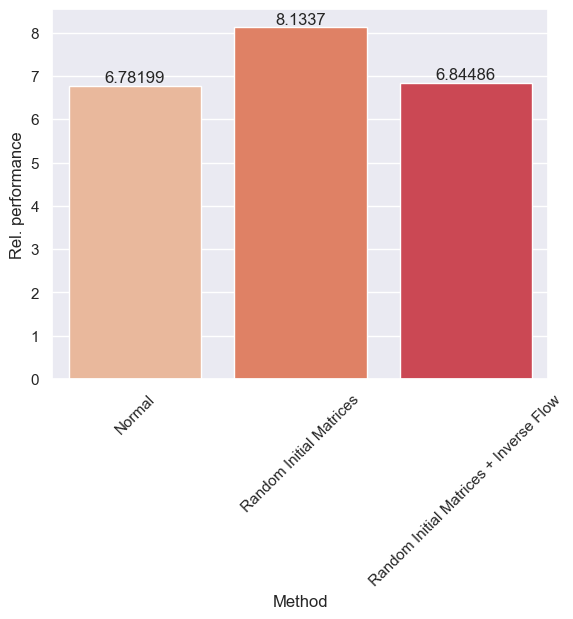

In [346]:
ax = sns.barplot(data=pd.DataFrame({
    "Method": [
        "Normal", 
        "Random Initial Matrices",
        "Random Initial Matrices + Inverse Flow",
    ],
    "Rel. performance": [
        vanilla_flow["speedup"].mean(),
        random_initial["speedup"].mean(),
        inverse_flow_random_initial["speedup"].mean(),
    ]
}), x="Method", y="Rel. performance")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i,)

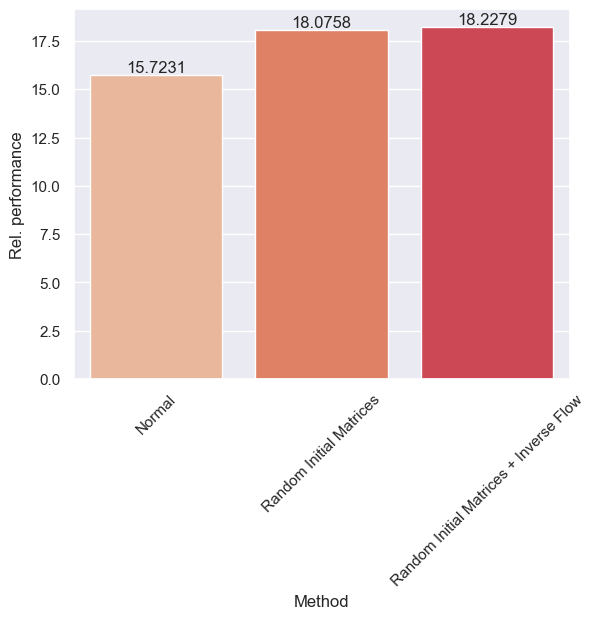

In [347]:
ax = sns.barplot(data=pd.DataFrame({
    "Method": [
        "Normal", 
        "Random Initial Matrices",
        "Random Initial Matrices + Inverse Flow",
    ],
    "Rel. performance": [
        vanilla_flow[vanilla_flow["leaf_count"] > 500]["speedup"].mean(),
        random_initial[random_initial["leaf_count"] > 500]["speedup"].mean(),
        inverse_flow_random_initial[inverse_flow_random_initial["leaf_count"] > 500]["speedup"].mean(),
    ]
}), x="Method", y="Rel. performance")

plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i,)

Text(0, 0.5, 'BDMM Log Likelihood')

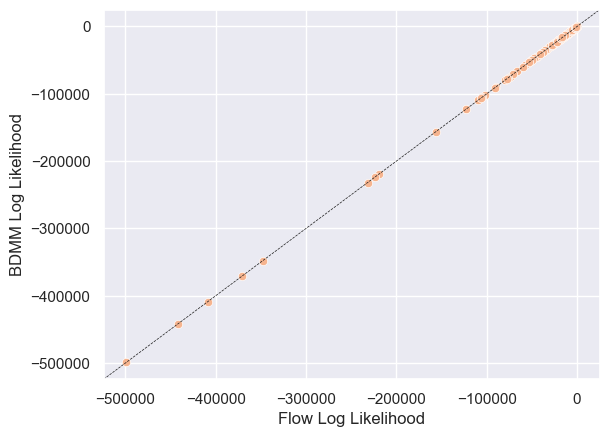

In [348]:
ax = sns.scatterplot(inverse_flow_random_initial, x="flow_likelihood", y="bdmm_likelihood")
ax.plot(ax.get_xlim(), ax.get_xlim(), linestyle='--', color='k', lw=0.5, scalex=False, scaley=False)

plt.xlabel('Flow Log Likelihood')
plt.ylabel('BDMM Log Likelihood')

Text(0, 0.5, 'Duration (ns)')

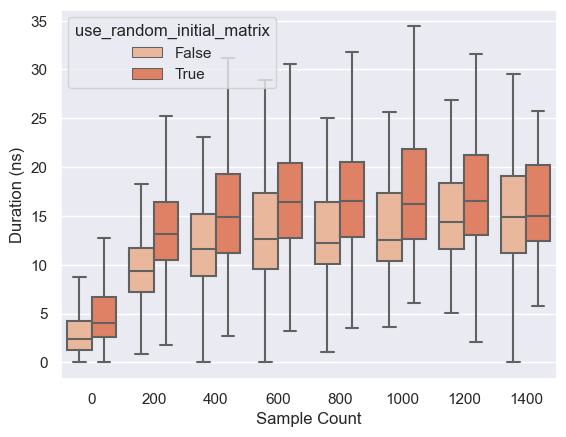

In [349]:
results["binned_leaves"] = results["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    results[results["binned_leaves"] < 1600],
    x="binned_leaves", y="speedup", hue="use_random_initial_matrix",
    showfliers=False
)

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

Text(0, 0.5, 'Duration (ns)')

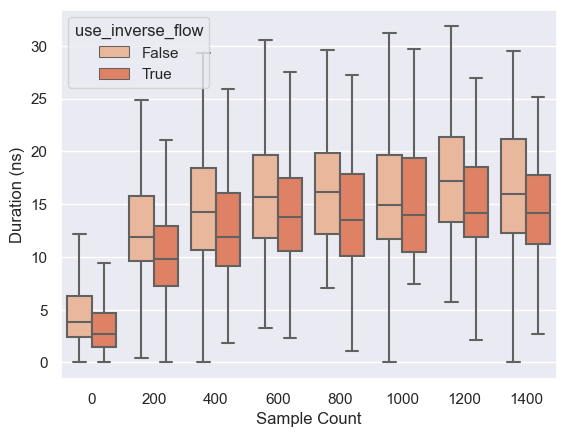

In [350]:
results["binned_leaves"] = results["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    results[(results["binned_leaves"] < 1600)],
    x="binned_leaves", y="speedup", hue="use_inverse_flow",
    showfliers=False
)

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

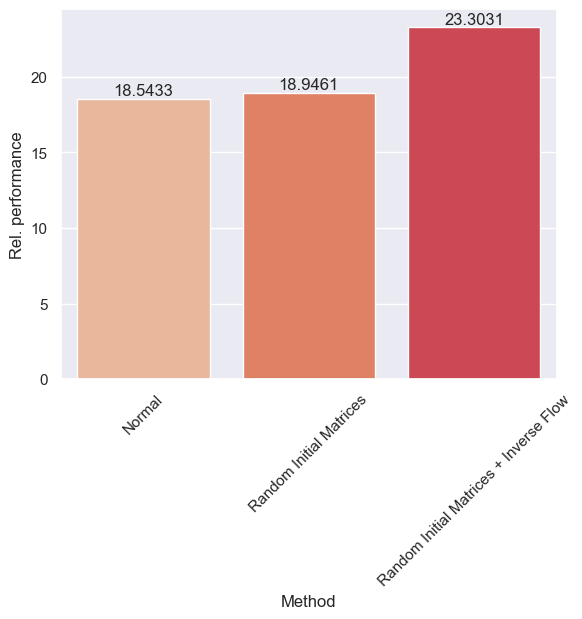

In [351]:
ax = sns.barplot(data=pd.DataFrame({
    "Method": [
        "Normal", 
        "Random Initial Matrices",
        "Random Initial Matrices + Inverse Flow",
    ],
    "Rel. performance": [
        vanilla_flow[(vanilla_flow["leaf_count"] > 500) & (vanilla_flow["num_intervals"] == 1)]["speedup"].mean(),
        random_initial[(random_initial["leaf_count"] > 500) & (random_initial["num_intervals"] == 1)]["speedup"].mean(),
        inverse_flow_random_initial[(inverse_flow_random_initial["leaf_count"] > 500) & (inverse_flow_random_initial["num_intervals"] == 1)]["speedup"].mean(),
    ]
}), x="Method", y="Rel. performance")

plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i,)

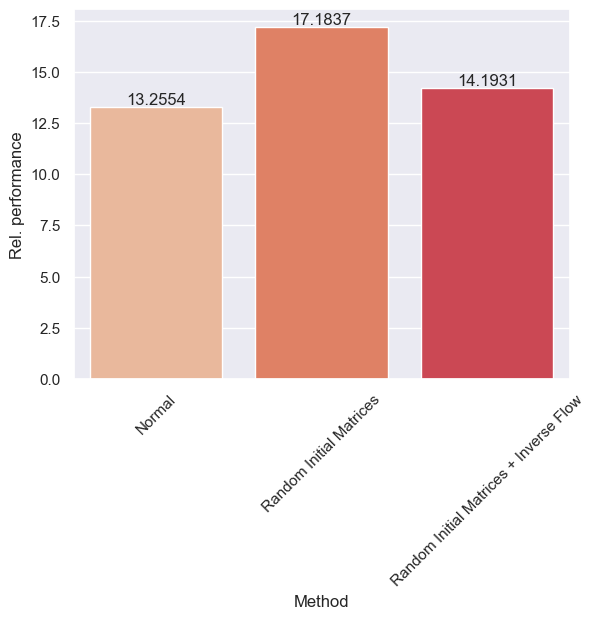

In [352]:
ax = sns.barplot(data=pd.DataFrame({
    "Method": [
        "Normal", 
        "Random Initial Matrices",
        "Random Initial Matrices + Inverse Flow",
    ],
    "Rel. performance": [
        vanilla_flow[(vanilla_flow["leaf_count"] > 500) & (vanilla_flow["num_intervals"] == 4)]["speedup"].mean(),
        random_initial[(random_initial["leaf_count"] > 500) & (random_initial["num_intervals"] == 4)]["speedup"].mean(),
        inverse_flow_random_initial[(inverse_flow_random_initial["leaf_count"] > 500) & (inverse_flow_random_initial["num_intervals"] == 4)]["speedup"].mean(),
    ]
}), x="Method", y="Rel. performance")

plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i,)

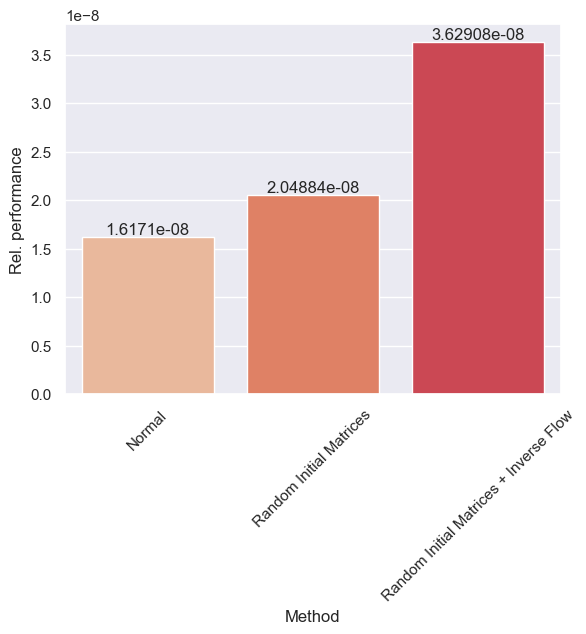

In [353]:
ax = sns.barplot(data=pd.DataFrame({
    "Method": [
        "Normal", 
        "Random Initial Matrices",
        "Random Initial Matrices + Inverse Flow",
    ],
    "Rel. performance": [
        ((vanilla_flow["bdmm_likelihood"] - vanilla_flow["flow_likelihood"]) / vanilla_flow["bdmm_likelihood"]).abs().mean(),
        ((random_initial["bdmm_likelihood"] - random_initial["flow_likelihood"]) / random_initial["bdmm_likelihood"]).abs().mean(),
        ((inverse_flow_random_initial["bdmm_likelihood"] - inverse_flow_random_initial["flow_likelihood"]) / inverse_flow_random_initial["bdmm_likelihood"]).abs().mean(), 
    ]
}), x="Method", y="Rel. performance")

plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i,)

Text(0, 0.5, 'Duration (ns)')

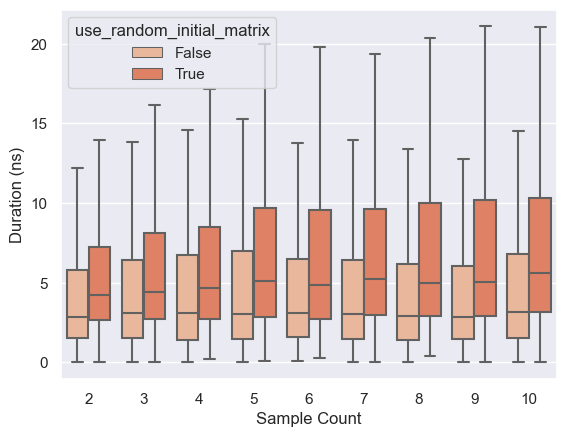

In [354]:
ax = sns.boxplot(
    results,
    x="types_count", y="speedup", hue="use_random_initial_matrix",
    showfliers=False
)

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

Text(0, 0.5, 'Duration (ns)')

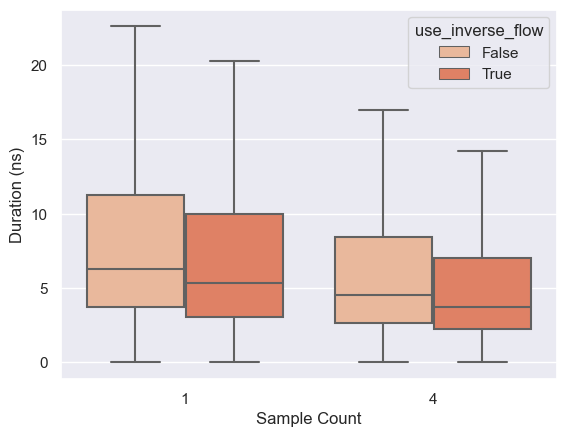

In [355]:
ax = sns.boxplot(
    results[results.use_random_initial_matrix],
    x="num_intervals", y="speedup", hue="use_inverse_flow",
    showfliers=False
)

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

Text(0, 0.5, 'Duration (ns)')

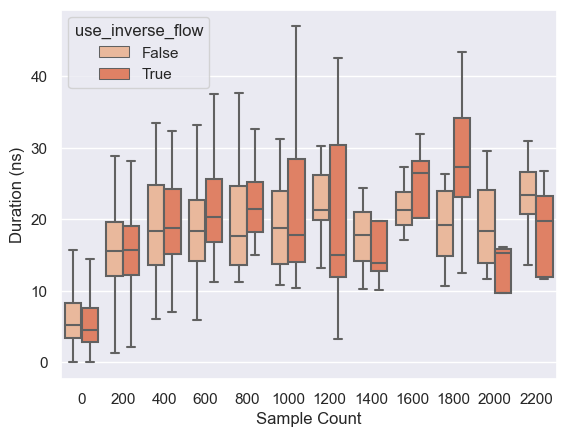

In [356]:
ax = sns.boxplot(
    results[(results.num_intervals == 1) & (results.binned_leaves < 2210) & (results.use_random_initial_matrix == True)],
    x="binned_leaves", y="speedup", hue="use_inverse_flow",
    showfliers=False
)

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')